# Heart Disease Prediction – Train Test Split & Evaluation

This notebook demonstrates how to split data into training and testing sets, train a Logistic Regression model, and evaluate it using accuracy, precision, recall, and confusion matrix.

## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [3]:
df = pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Dataset Structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Separating Features and Target

In [5]:
X = df.drop("target", axis=1)
y = df["target"]

## Train-Test Split

The dataset is split into training and testing sets to evaluate how well the model performs on unseen data.

## Purpose of Training and Testing

The training set is used to teach the machine learning model by learning patterns from the data.  
The testing set is used to evaluate how well the trained model performs on unseen data.

This separation helps detect overfitting and ensures that the model generalizes well instead of memorizing the training data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Logistic Regression Model

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## Making Predictions on Test Data

In [9]:
y_pred = model.predict(X_test)

## Model Evaluation

In [10]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)

Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875


##Confusion Matrix
A confusion matrix shows the comparison between actual and predicted values.

- True Positive (TP): Correctly predicted heart disease
- True Negative (TN): Correctly predicted no heart disease
- False Positive (FP): Predicted heart disease but actually no disease
- False Negative (FN): Predicted no disease but actually heart disease

It helps understand where the model is making correct and incorrect predictions.

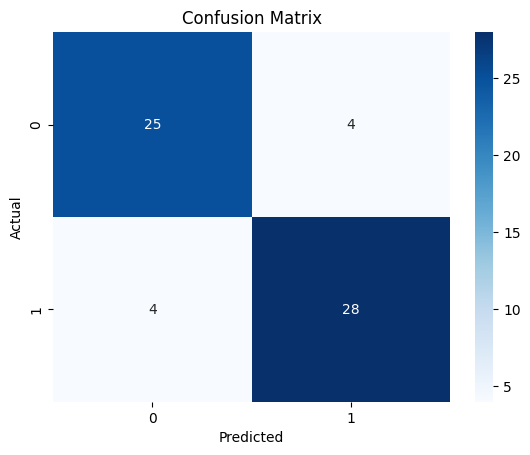

In [11]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Classification Report

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Evaluation Report

The trained Logistic Regression model was evaluated on the test dataset using multiple metrics.

- Accuracy measures overall correctness.
- Precision measures how many predicted positives were actually positive.
- Recall measures how many actual positives were correctly identified.
- The confusion matrix summarizes true and false predictions.

These metrics together form the evaluation report for the model.

## Model Performance Summary

- Dataset was split into training and testing sets.
- Logistic Regression model was trained.
- Model predictions were evaluated using accuracy, precision, recall.
- Confusion matrix visualized correct and incorrect predictions.
- The model shows reasonable performance on unseen data.